# Lab9: QFT and Inverse QFT Circuit
    by Muhammad Faryad

In [1]:
from qiskit import QuantumCircuit,  execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
import numpy as np
pi = np.pi

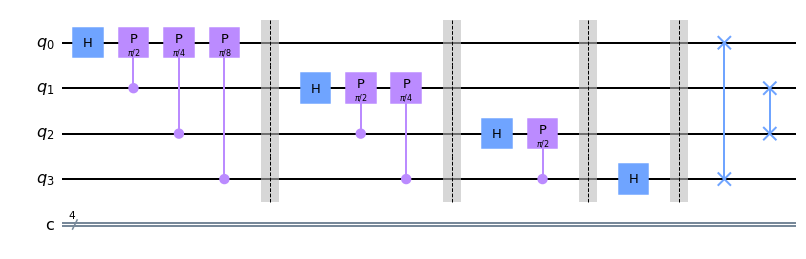

In [3]:
qft4=QuantumCircuit(4,4,name='qft4')

for i in range(4):
    qft4.h(i)
    p=0
    for j in range(i+1,4):
        p+=1
        qft4.cp(pi/(2**(p)),j,i)
    qft4.barrier()

for i in range(int(4/2)):
    qft4.swap(i,4-1-i)

qft4.draw('mpl')
        

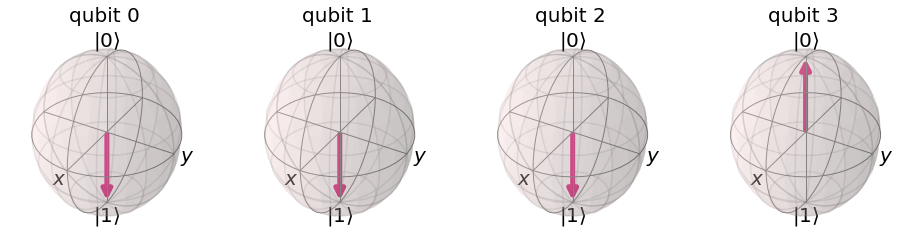

In [4]:
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0111')
plot_bloch_multivector(sv)


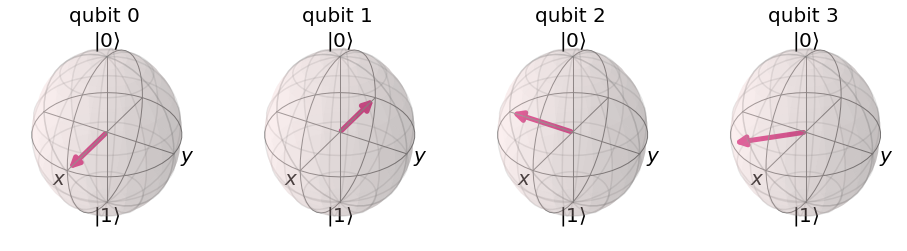

In [5]:
new_sv = sv.evolve(qft4)
plot_bloch_multivector(new_sv)

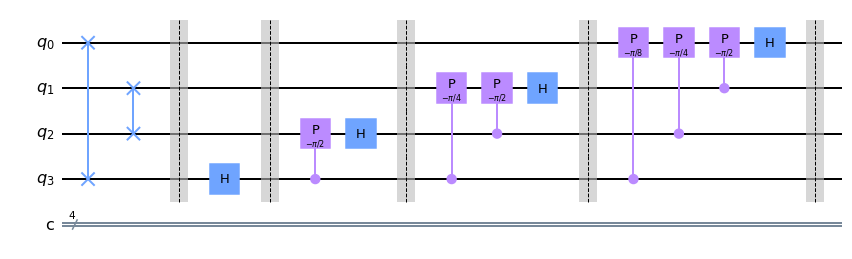

In [8]:
iqft4=QuantumCircuit(4,4,name='iqft4')

for i in range(int(4/2)):
    iqft4.swap(i,4-1-i)

iqft4.barrier()

for i in range(4-1,-1,-1):
    for j in range(4-1,i,-1):
        k=j-i
        iqft4.cp(-pi/(2**k),j,i)
    iqft4.h(i)
    iqft4.barrier()

iqft4.draw('mpl')

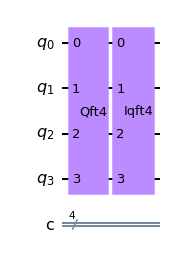

In [10]:
identity4=QuantumCircuit(4,4,name='qftiqft4')
identity4.append(qft4,range(4))
identity4.append(iqft4,range(4))
#for i in range(4):
#    identity4.measure(i,i)
identity4.draw('mpl')

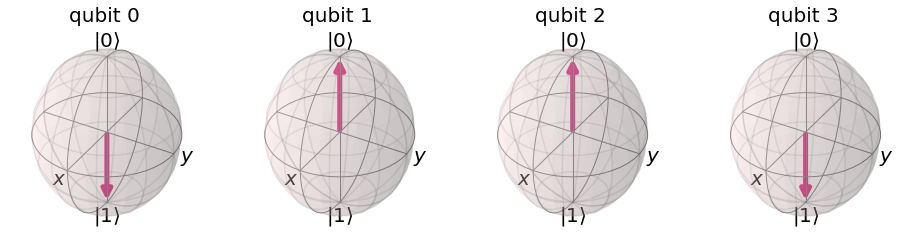

In [11]:
sv = Statevector.from_label('1001')
plot_bloch_multivector(sv)

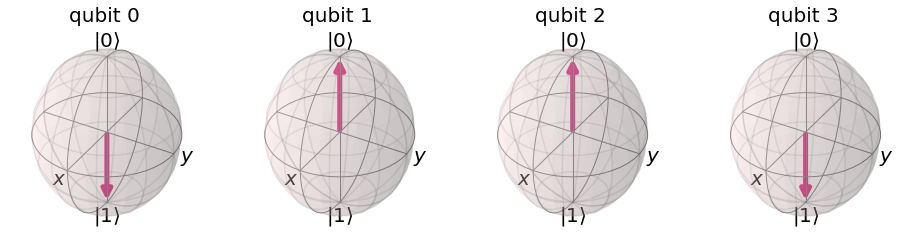

In [12]:
new_sv = sv.evolve(identity4)
plot_bloch_multivector(new_sv)